In [8]:
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy as np

## Surface fluxes

In [14]:
tvsbc_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/temp-vdiffuse-sbc/gn/v20191108/temp-vdiffuse-sbc-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
sfch_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/sfch/gn/v20191108/sfch-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
sfcv_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/sfcv/gn/v20191108/sfcv-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
sfc_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/sfc/gn/v20191108/sfc-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
sw_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/sw-heat/gn/v20191108/sw-heat-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
frazil_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/frazil-3d/gn/v20191108/frazil-3d-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
eta_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/temp-eta-smooth/gn/v20191108/temp-eta-smooth-tos-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
hfds_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/hfds/gn/v20191108/hfds-tos-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'

In [15]:
tvsbc_cube = iris.load_cube(tvsbc_file, 'vert diffusion of heat due to surface flux')
sfch_cube = iris.load_cube(sfch_file, 'surface heat fluxes')
sfcv_cube = iris.load_cube(sfcv_file, 'surface heat fluxes from surface volume fluxes')
sfc_cube = iris.load_cube(sfc_file, 'total surface forcing')
sw_cube = iris.load_cube(sw_file, 'downwelling_shortwave_flux_in_sea_water')
frazil_cube = iris.load_cube(frazil_file, 'ocn frazil heat flux over time step')
eta_cube = iris.load_cube(eta_file, 'surface smoother for temp')
hfds_cube = iris.load_cube(hfds_file, 'surface_downward_heat_flux_in_sea_water')

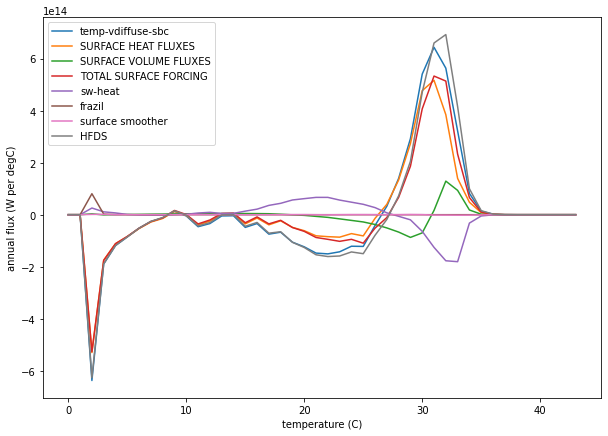

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(tvsbc_cube.data[0, :, -1], label='temp-vdiffuse-sbc')
plt.plot(sfch_cube.data[0, :, -1], label='SURFACE HEAT FLUXES')
plt.plot(sfcv_cube.data[0, :, -1], label='SURFACE VOLUME FLUXES')
plt.plot(sfc_cube.data[0, :, -1], label='TOTAL SURFACE FORCING')
plt.plot(sw_cube.data[0, :, -1], label='sw-heat')
plt.plot(frazil_cube.data[0, :, -1], label='frazil')
plt.plot(eta_cube.data[0, :, -1], label='surface smoother')
plt.plot(hfds_cube.data[0, :, -1], label='HFDS')
plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('annual flux (W per degC)')
plt.show()

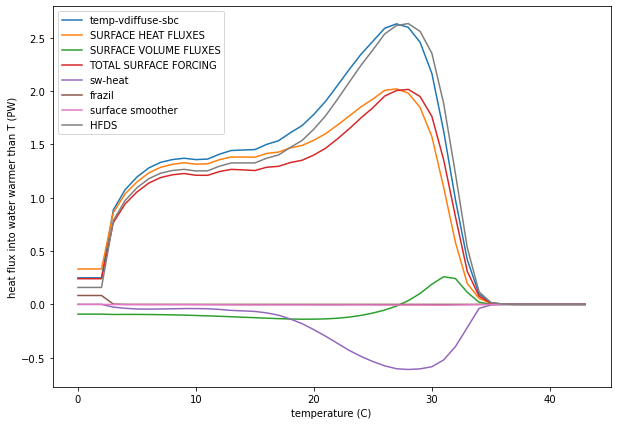

In [17]:
plt.figure(figsize=(10, 7))

tvsbc_data = tvsbc_cube.data[0, :, -1]
tvsbc_reverse_cumsum = np.cumsum(tvsbc_data[::-1])[::-1] / 1e15
plt.plot(tvsbc_reverse_cumsum, label='temp-vdiffuse-sbc')

sfch_data = sfch_cube.data[0, :, -1]
sfch_reverse_cumsum = np.cumsum(sfch_data[::-1])[::-1] / 1e15
plt.plot(sfch_reverse_cumsum, label='SURFACE HEAT FLUXES')

sfcv_data = sfcv_cube.data[0, :, -1]
sfcv_reverse_cumsum = np.cumsum(sfcv_data[::-1])[::-1] / 1e15
plt.plot(sfcv_reverse_cumsum, label='SURFACE VOLUME FLUXES')

sfc_data = sfc_cube.data[0, :, -1]
sfc_reverse_cumsum = np.cumsum(sfc_data[::-1])[::-1] / 1e15
plt.plot(sfc_reverse_cumsum, label='TOTAL SURFACE FORCING')

sw_data = sw_cube.data[0, :, -1]
sw_reverse_cumsum = np.cumsum(sw_data[::-1])[::-1] / 1e15
plt.plot(sw_reverse_cumsum, label='sw-heat')

frazil_data = frazil_cube.data[0, :, -1]
frazil_reverse_cumsum = np.cumsum(frazil_data[::-1])[::-1] / 1e15
plt.plot(frazil_reverse_cumsum, label='frazil')

eta_data = eta_cube.data[0, :, -1]
eta_reverse_cumsum = np.cumsum(eta_data[::-1])[::-1] / 1e15
plt.plot(eta_reverse_cumsum, label='surface smoother')

hfds_data = hfds_cube.data[0, :, -1]
hfds_reverse_cumsum = np.cumsum(hfds_data[::-1])[::-1] / 1e15
plt.plot(hfds_reverse_cumsum, label='HFDS')

plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('heat flux into water warmer than T (PW)')
plt.show()

## Mixing

In [33]:
mix_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/mix/gn/v20191108/mix-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
vmix_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/vmix/gn/v20191108/vmix-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
smix_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/smix/gn/v20191108/smix-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
rmix_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/rmix/gn/v20191108/rmix-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'

In [34]:
mix_cube = iris.load_cube(mix_file, 'total explicit mixing')
vmix_cube = iris.load_cube(vmix_file, 'vertical mixing')
smix_cube = iris.load_cube(smix_file, 'miscellaneous mixing')
rmix_cube = iris.load_cube(rmix_file, 'neutral diffusion')

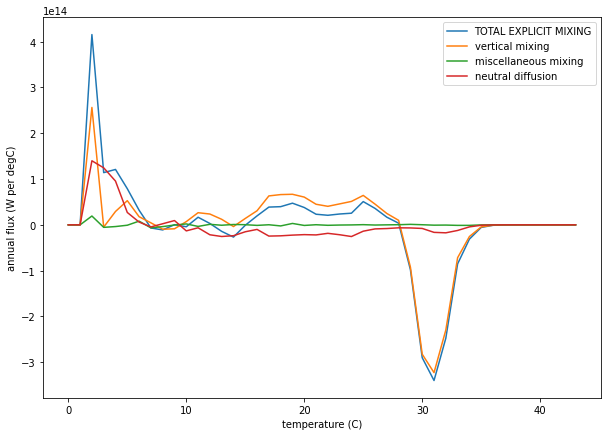

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(mix_cube.data[0, :, -1], label='TOTAL EXPLICIT MIXING')
plt.plot(vmix_cube.data[0, :, -1], label='vertical mixing')
plt.plot(smix_cube.data[0, :, -1], label='miscellaneous mixing')
plt.plot(rmix_cube.data[0, :, -1], label='neutral diffusion')
plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('annual flux (W per degC)')
plt.show()

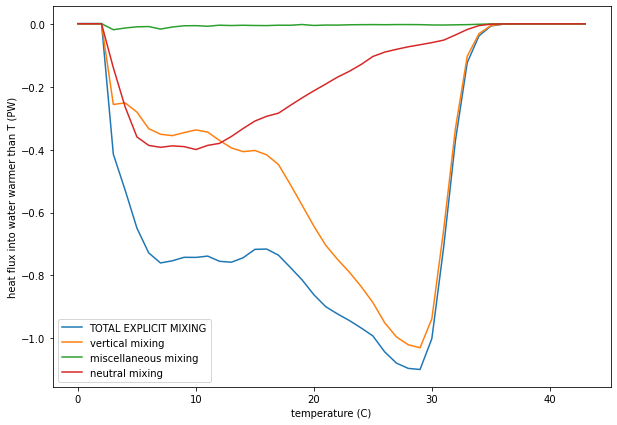

In [36]:
plt.figure(figsize=(10, 7))

mix_data = mix_cube.data[0, :, -1]
mix_reverse_cumsum = np.cumsum(mix_data[::-1])[::-1] / 1e15
plt.plot(mix_reverse_cumsum, label='TOTAL EXPLICIT MIXING')

vmix_data = vmix_cube.data[0, :, -1]
vmix_reverse_cumsum = np.cumsum(vmix_data[::-1])[::-1] / 1e15
plt.plot(vmix_reverse_cumsum, label='vertical mixing')

smix_data = smix_cube.data[0, :, -1]
smix_reverse_cumsum = np.cumsum(smix_data[::-1])[::-1] / 1e15
plt.plot(smix_reverse_cumsum, label='miscellaneous mixing')

rmix_data = rmix_cube.data[0, :, -1]
rmix_reverse_cumsum = np.cumsum(rmix_data[::-1])[::-1] / 1e15
plt.plot(rmix_reverse_cumsum, label='neutral mixing')

plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('heat flux into water warmer than T (PW)')
plt.show()

## Internal surface forcing

In [37]:
sfci_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/sfci/gn/v20191108/sfci-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'

In [38]:
sfci_cube = iris.load_cube(sfci_file, 'total internal surface forcing')

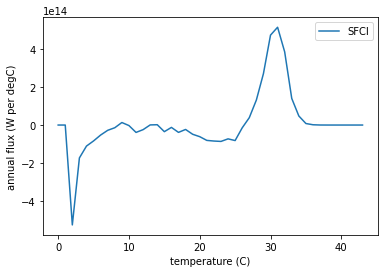

In [39]:
plt.plot(sfci_cube.data[0, :, -1], label='SFCI')
plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('annual flux (W per degC)')
plt.show()

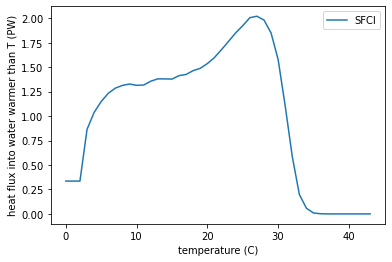

In [40]:
sfci_data = sfci_cube.data[0, :, -1]
sfci_reverse_cumsum = np.cumsum(sfci_data[::-1])[::-1] / 1e15
plt.plot(sfci_reverse_cumsum, label='SFCI')

plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('heat flux into water warmer than T (PW)')
plt.show()

In [9]:
wfo_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/wfo/gn/v20191108/wfo-tos-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
wfo_cube = iris.load_cube(wfo_file, 'water_flux_into_sea_water')

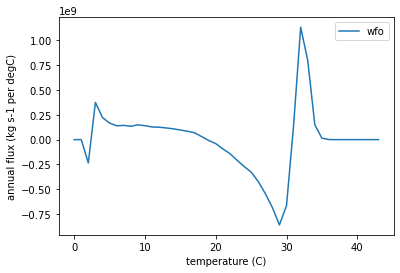

In [30]:
plt.plot(wfo_cube.data[0, :, -1], label='wfo')
plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('annual flux (kg s-1 per degC)')
plt.show()

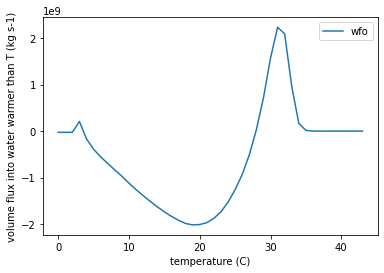

In [24]:
wfo_reverse_cumsum = np.cumsum(wfo_data[::-1])[::-1]
plt.plot(wfo_reverse_cumsum, label='wfo')

plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('volume flux into water warmer than T (kg s-1)')
plt.show()

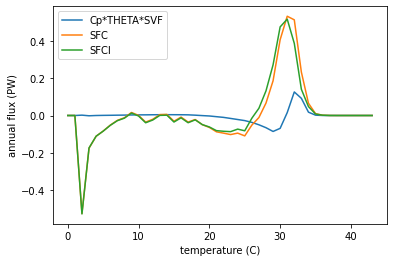

In [35]:
wfo_data = wfo_cube.data[0, :, -1]

cp = 3992.10322329649
lower_thetao_bounds = wfo_cube.coord('sea_surface_temperature').bounds[:, 0]

wfo_term = wfo_data * cp * lower_thetao_bounds  #wfo_reverse_cumsum * cp * lower_thetao_bounds
sfc_term = sfc_cube.data[0, :, -1]
derived_sfci = sfc_term - wfo_term

plt.plot(wfo_term / 1e15, label='Cp*THETA*SVF')
plt.plot(sfc_term / 1e15, label='SFC')
plt.plot(derived_sfci / 1e15, label='SFCI')
plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('annual flux (PW)')
plt.show()

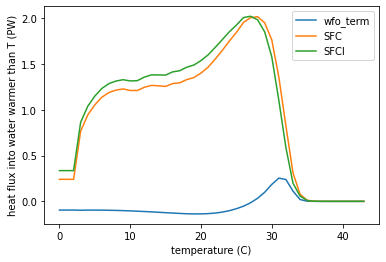

In [36]:
wfo_term_reverse_cumsum = np.cumsum(wfo_term[::-1])[::-1] / 1e15
plt.plot(wfo_term_reverse_cumsum, label='wfo_term')

sfc_term_reverse_cumsum = np.cumsum(sfc_term[::-1])[::-1] / 1e15
plt.plot(sfc_term_reverse_cumsum, label='SFC')

derived_sfci_reverse_cumsum = np.cumsum(derived_sfci[::-1])[::-1] / 1e15
plt.plot(derived_sfci_reverse_cumsum, label='SFCI')

plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('heat flux into water warmer than T (PW)')
plt.show()